In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Importing Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#cheking null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#cheking duplicates
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


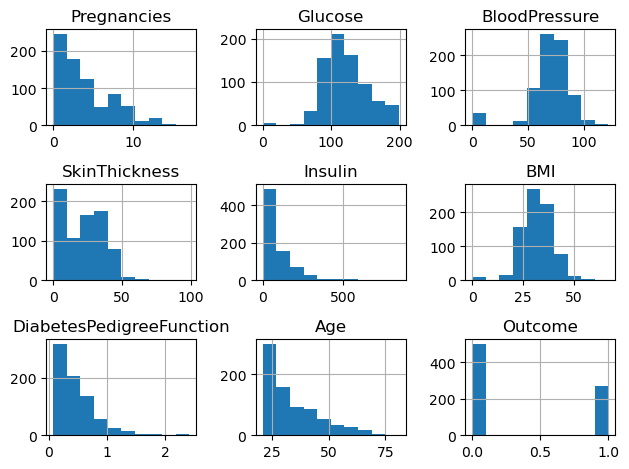

In [10]:
df.hist()
plt.tight_layout()

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.loc[:,'Glucose':'BMI']=df.loc[:,'Glucose':'BMI'].replace(0,np.nan)

In [14]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
si = SimpleImputer(strategy='median')

In [16]:
df.loc[:,'Glucose':'BMI'] = si.fit_transform(df.loc[:,'Glucose':'BMI'])

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [21]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [23]:
X = sc.fit_transform(X)

In [24]:
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(Xtrain,ytrain)
ypred = knn.predict(Xtest)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
confusion_matrix(ytest,ypred)

array([[109,  14],
       [ 25,  44]], dtype=int64)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.76      0.64      0.69        69

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [33]:
print(f'Accuracy for Training:',knn.score(Xtrain,ytrain))
print(f'Accuracy for Testing:',knn.score(Xtest,ytest))

Accuracy for Training: 0.8177083333333334
Accuracy for Testing: 0.796875


# Select the best value for k

In [34]:
trainac = []
testac = []


for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    ypred = knn.predict(Xtest)
    trainac.append(knn.score(Xtrain,ytrain))
    testac.append(knn.score(Xtest,ytest))

Text(0, 0.5, 'Accuracy')

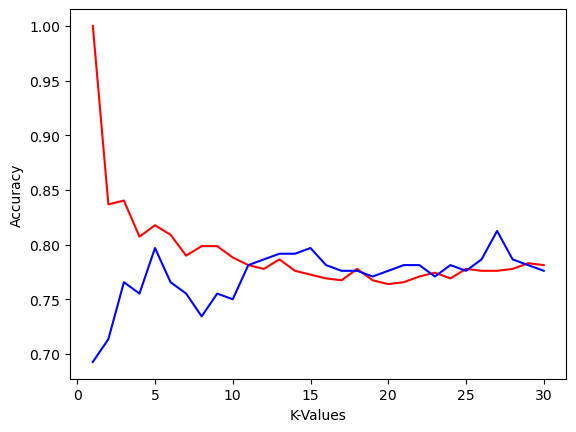

In [35]:
plt.plot(range(1,31),trainac,color = 'r')
plt.plot(range(1,31),testac,color='b')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')

In [41]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(Xtrain,ytrain)
ypred = knn.predict(Xtest)
print(knn.score(Xtrain,ytrain))
print(knn.score(Xtest,ytest))

0.78125
0.78125
